In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 600)

%matplotlib inline

In [3]:
raw_data = pd.read_csv('../data/raw_data.csv')
data1 = raw_data.copy()
data1 = data1.drop_duplicates(subset=['Id', 'Url'], keep='first')
data1.reset_index(drop=True, inplace=True)

In [4]:
data1.head()

,Id,Title,Description,Region,City,Location,Renovation,Floor,Total_floors,Area,Kitchen_area,Rooms,Walls_types,Class,Layout,Heating,Furnish,Comfort,Apartment_type,Communications_500m,Infrastructure,Url,Price,Currency
0,768091445,Двохкімн. квартира на першому поверсі двох пов...,"Двохкімн. квартира на першому поверсі,<br />\r...",if,gorodenka,"Городенка, Івано-Франківська область",Житловий стан,1.0,2.0,64.0,15.0,2,Цегляний,Економ,"Суміжна, прохідна",Індивідуальне газове,Ні,NaN,NaN,NaN,"Супермаркет, ТРЦ, Автовокзал, Центр міста, Апт...",https://www.olx.ua/d/uk/obyavlenie/dvohkmn-kva...,360000,UAH
1,791045422,Продам гостинку свои службы Н.Бавария ул.Любо...,Продам гостинку на Баварии в районе меховой фа...,if,dibrova_1377,"Діброва, Івано-Франківська область",Косметичний ремонт,1.0,4.0,17.0,4.0,1,Цегляний,Економ,Студія,Індивідуальне електро,NaN,NaN,NaN,NaN,NaN,https://www.olx.ua/d/uk/obyavlenie/prodam-gost...,9000,USD
2,801025874,1-к. квартира 18 м2 з меблями в малосімейці у ...,Продається компактна 1-кімнатна квартира загал...,if,ivano-frankovsk,"Івано-Франківськ, Івано-Франківська область",Житловий стан,5.0,5.0,18.0,4.0,1,Панельний,NaN,"Малосімейка, гостинка",Централізоване,Так,Меблі на кухні,NaN,"Газ, Центральний водопровід, Електрика, Центра...","Дитячий садок, Школа, Зупинка транспорту, Мага...",https://www.olx.ua/d/uk/obyavlenie/1-k-kvartir...,8500,USD
3,783746749,"1 квартира, вул. Мазепи, Бам, Франківськ",Кімната в гуртожитку на дев'ятому поверсі дев`...,if,ivano-frankovsk,"Івано-Франківськ, Івано-Франківська область",Житловий стан,9.0,9.0,25.0,15.0,1,Цегляний,Економ,Роздільна,Централізоване,Ні,"Ліфт, Меблі на кухні, Паркувальне місце, Душов...",Житловий фонд 80-90-і,"Асфальтована дорога, Центральна каналізація, Е...","Відділення банку, банкомат, Аптека, Дитячий са...",https://www.olx.ua/d/uk/obyavlenie/1-kvartira-...,7500,USD
4,801272720,Продається 2 кімнатна квартира,Продається 2 кімнатна квартира в центрі міста ...,if,gorodenka,"Городенка, Івано-Франківська область",Косметичний ремонт,2.0,2.0,48.0,12.0,2,Цегляний,Комфорт,"Суміжна, прохідна",Індивідуальне газове,Так,"Меблі на кухні, Душова кабіна",Царський будинок,"Центральна каналізація, Вивіз відходів, Газ, А...","Ринок, Зупинка транспорту, Парк, зелена зона, ...",https://www.olx.ua/d/uk/obyavlenie/prodatsya-2...,10000,USD


In [5]:
data1.shape

(86870, 24)

In [6]:
data2 = data1.copy()
data2.drop(['Id', 'Title', 'Description', 'Url'], axis=1, inplace=True)

## Change names of regions

In [7]:
data2['Region'].value_counts()

Region
ko     28472
od     19071
dnp     7549
kha     6922
lv      3377
khm     3068
pol     2145
zap     1937
nik     1749
chk     1355
if      1218
sum     1148
rov     1120
zht     1060
vin     1023
kir      871
don      832
ter      820
chn      818
chv      816
zak      790
vol      479
lug      175
khe       55
Name: count, dtype: int64

In [8]:
data2['City'].value_counts()[:10]

City
odessa                      17658
kiev                        17560
kharkov                      6159
dnepr                        4517
irpen                        3885
khmelnitskiy                 2612
lvov                         2336
zaporozhe                    1883
sofievskaya-borschagovka     1503
nikolaev_106                 1470
Name: count, dtype: int64

In [9]:
region_names = {'ko': 'kiev', 'od': 'odessa', 'dnp': 'dnepr', 'kha': 'kharkov', 'khm': 'khmelnitskiy', 'lv': 'lvov',
                'pol': 'poltava', 'zap': 'zaporozhe', 'nik': 'nikolaev_106', 'chk': 'cherkassy', 'don': 'donetsk', 
                'if': 'ivano-frankovsk', 'zht': 'zhitomir', 'vin': 'vinnitsa', 'sum': 'sumy', 'rov': 'rovno',
                'chn': 'chernigov', 'kir': 'kropivnitskiy','ter': 'ternopol', 'zak': 'uzhgorod', 'chv': 'chernovtsy',
                'lug': 'lugansk', 'vol': 'lutsk', 'khe': 'kherson'}

data2['Region'] = data2['Region'].map(region_names)

In [10]:
data2.head()

,Region,City,Location,Renovation,Floor,Total_floors,Area,Kitchen_area,Rooms,Walls_types,Class,Layout,Heating,Furnish,Comfort,Apartment_type,Communications_500m,Infrastructure,Price,Currency
0,ivano-frankovsk,gorodenka,"Городенка, Івано-Франківська область",Житловий стан,1.0,2.0,64.0,15.0,2,Цегляний,Економ,"Суміжна, прохідна",Індивідуальне газове,Ні,NaN,NaN,NaN,"Супермаркет, ТРЦ, Автовокзал, Центр міста, Апт...",360000,UAH
1,ivano-frankovsk,dibrova_1377,"Діброва, Івано-Франківська область",Косметичний ремонт,1.0,4.0,17.0,4.0,1,Цегляний,Економ,Студія,Індивідуальне електро,NaN,NaN,NaN,NaN,NaN,9000,USD
2,ivano-frankovsk,ivano-frankovsk,"Івано-Франківськ, Івано-Франківська область",Житловий стан,5.0,5.0,18.0,4.0,1,Панельний,NaN,"Малосімейка, гостинка",Централізоване,Так,Меблі на кухні,NaN,"Газ, Центральний водопровід, Електрика, Центра...","Дитячий садок, Школа, Зупинка транспорту, Мага...",8500,USD
3,ivano-frankovsk,ivano-frankovsk,"Івано-Франківськ, Івано-Франківська область",Житловий стан,9.0,9.0,25.0,15.0,1,Цегляний,Економ,Роздільна,Централізоване,Ні,"Ліфт, Меблі на кухні, Паркувальне місце, Душов...",Житловий фонд 80-90-і,"Асфальтована дорога, Центральна каналізація, Е...","Відділення банку, банкомат, Аптека, Дитячий са...",7500,USD
4,ivano-frankovsk,gorodenka,"Городенка, Івано-Франківська область",Косметичний ремонт,2.0,2.0,48.0,12.0,2,Цегляний,Комфорт,"Суміжна, прохідна",Індивідуальне газове,Так,"Меблі на кухні, Душова кабіна",Царський будинок,"Центральна каналізація, Вивіз відходів, Газ, А...","Ринок, Зупинка транспорту, Парк, зелена зона, ...",10000,USD


## Floors errors

In [11]:
print(f"кількість рядків - {data2.shape[0]}")
print(f"кількість рядків c помилкою - {data2[data2.Floor > data2.Total_floors].shape[0]}")

кількість рядків - 86870
кількість рядків c помилкою - 114


In [12]:
def fix_floors_error(df):
    indexs = df[df.Floor > df.Total_floors].index
    floor = df[df.Floor > df.Total_floors].Floor
    total_floors = df[df.Floor > df.Total_floors].Total_floors
    
    df.loc[indexs, 'Floor'] = total_floors
    df.loc[indexs, 'Total_floors'] = floor
    return df

In [13]:
data3 = data2.copy()
data3 = fix_floors_error(data3)

Also, I want to delete houses from my data

In [14]:
data3 = data3[data3.Total_floors != 1]

In [15]:
print(f"кількість рядків - {data3.shape[0]}")
print(f"кількість рядків c помилкою - {data3[data3.Floor > data3.Total_floors].shape[0]}")

кількість рядків - 85665
кількість рядків c помилкою - 0


## Missing values

In [16]:
dict_na = {'Total': data3.isna().sum().values, 'Percent': data3.isna().sum().values / data3.shape[0] * 100} 

df_na = pd.DataFrame(data=dict_na, index=data3.columns).sort_values(by='Total', ascending=False)

df_na[df_na.Total > 0]

,Total,Percent
Class,44695,52.174167
Communications_500m,44430,51.864822
Comfort,43035,50.236386
Apartment_type,38543,44.992704
Infrastructure,38350,44.767408
Furnish,31491,36.760637
Walls_types,28579,33.361349
Layout,28436,33.194420
Heating,24423,28.509893
Renovation,21787,25.432791


In [17]:
data4 = data3.drop(['Class', 'Communications_500m', 'Comfort', 'Infrastructure', 'Apartment_type', 'Furnish', 'Walls_types',
                   'Layout', 'Heating', 'Renovation'], axis=1)

In [18]:
def fill_na(df):
    # Fill Total_floors
    new_df = df.copy()
    for i in range(df[df.Total_floors.isna()]['Total_floors'].shape[0]):
        if df[df.Total_floors.isna()]['Floor'].iloc[i] > 9: #df['Total_floors'].median():
            index = df[df.Total_floors.isna()].index[i]
            new_df.loc[index, 'Total_floors'] = df.loc[index, 'Floor']
        else:
            index = df[df.Total_floors.isna()].index[i]
            new_df.loc[index, 'Total_floors'] = df['Total_floors'].median()
            
    
    # Fill Floor
    final_df = new_df.copy()
    for i in range(new_df[new_df.Floor.isna()].shape[0]):
        if new_df[new_df.Floor.isna()].Total_floors.iloc[i] < new_df.Floor.median():
            index = new_df[new_df.Floor.isna()].index[i]
            final_df.loc[index, 'Floor'] =  new_df.loc[index, 'Total_floors']
        else:
            index = new_df[new_df.Floor.isna()].index[i]
            final_df.loc[index, 'Floor'] =  new_df['Floor'].median()
    
    return final_df

In [19]:
data5 = data4.copy()
data5 = fill_na(data5)

In [20]:
print(f'Пропущені значення - {data5.isna().sum().sum()}')
print(f'Помилка поверховості - {data5[data5.Floor > data5.Total_floors].shape[0]}')

Пропущені значення - 0
Помилка поверховості - 0


## Currency (UAH to USD)

In [21]:
indexes = data5[data5.Currency == 'UAH'].index
data5[data5.Currency == 'UAH']

,Region,City,Location,Floor,Total_floors,Area,Kitchen_area,Rooms,Price,Currency
0,ivano-frankovsk,gorodenka,"Городенка, Івано-Франківська область",1.0,2.0,64.0,15.0,2,360000,UAH
60,dnepr,zhyeltye-vody,"Жовті Води, Дніпропетровська область",5.0,5.0,40.5,5.4,2,250000,UAH
73,dnepr,pershotravensk,"Першотравенськ, Дніпропетровська область",4.0,5.0,43.0,5.0,2,245000,UAH
135,dnepr,krivoyrog,"Кривий Ріг, Дніпропетровська область",2.0,5.0,44.1,5.5,2,268963,UAH
138,dnepr,krivoyrog,"Кривий Ріг, Дніпропетровська область",8.0,9.0,39.6,7.4,1,247000,UAH
...,...,...,...,...,...,...,...,...,...,...
81784,odessa,odessa,"Одеса, Одеська область",3.0,9.0,65.0,30.0,1,7800000,UAH
83172,kiev,kiev,"Київ, Київська область",6.0,7.0,231.7,28.3,5,10253597,UAH
84697,kiev,kiev,"Київ, Київська область",3.0,3.0,165.0,29.0,4,15000000,UAH
85527,kiev,kiev,"Київ, Київська область",6.0,7.0,330.0,43.0,5,16650000,UAH


olx конвертує валюту по курсу Google Finance. Тому я теж буду використовувати його.

In [22]:
from bs4 import BeautifulSoup
import requests

req = requests.get('https://www.google.com/finance/quote/USD-UAH?sa=X&ved=2ahUKEwiWjbC16vH-AhVtiYsKHbemBrkQmY0JegQIBhAc')
src = req.text

soup = BeautifulSoup(src)
rate = soup.find('div', class_='YMlKec fxKbKc').text
print(f'1 USD = {rate} UAH')

data6 = data5.copy()
data6.loc[data6.Currency == 'UAH', 'Price'] = round(data6[data6.Currency == 'UAH']['Price']/float(rate))
data6.loc[data6.Currency == 'UAH', 'Currency'] = 'USD'

1 USD = 37.0321 UAH


In [23]:
data6.loc[indexes].head()

,Region,City,Location,Floor,Total_floors,Area,Kitchen_area,Rooms,Price,Currency
0,ivano-frankovsk,gorodenka,"Городенка, Івано-Франківська область",1.0,2.0,64.0,15.0,2,9721,USD
60,dnepr,zhyeltye-vody,"Жовті Води, Дніпропетровська область",5.0,5.0,40.5,5.4,2,6751,USD
73,dnepr,pershotravensk,"Першотравенськ, Дніпропетровська область",4.0,5.0,43.0,5.0,2,6616,USD
135,dnepr,krivoyrog,"Кривий Ріг, Дніпропетровська область",2.0,5.0,44.1,5.5,2,7263,USD
138,dnepr,krivoyrog,"Кривий Ріг, Дніпропетровська область",8.0,9.0,39.6,7.4,1,6670,USD


In [24]:
data6.drop('Currency', axis=1, inplace=True)

Тепер колонка 'Currency' нам не потрібна.

## Data types changing

In [25]:
data6.dtypes

Region           object
City             object
Location         object
Floor           float64
Total_floors    float64
Area            float64
Kitchen_area    float64
Rooms             int64
Price             int64
dtype: object

In [26]:
data7 = data6.copy()
data7['Floor'] = data7['Floor'].astype('int64')
data7['Total_floors'] = data7['Total_floors'].astype('int64')


In [27]:
data7.dtypes

Region           object
City             object
Location         object
Floor             int64
Total_floors      int64
Area            float64
Kitchen_area    float64
Rooms             int64
Price             int64
dtype: object

## Outliars

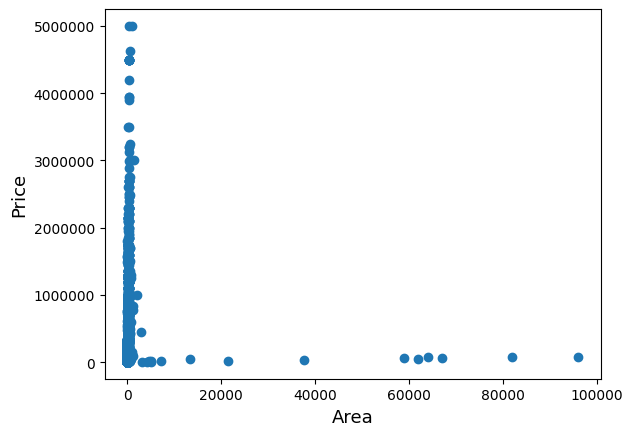

In [28]:
fig, ax = plt.subplots()
ax.scatter(x = data7['Area'], y = data7['Price'])
ax.ticklabel_format(style='plain')
plt.ylabel('Price', fontsize=13)
plt.xlabel('Area', fontsize=13)
plt.show()

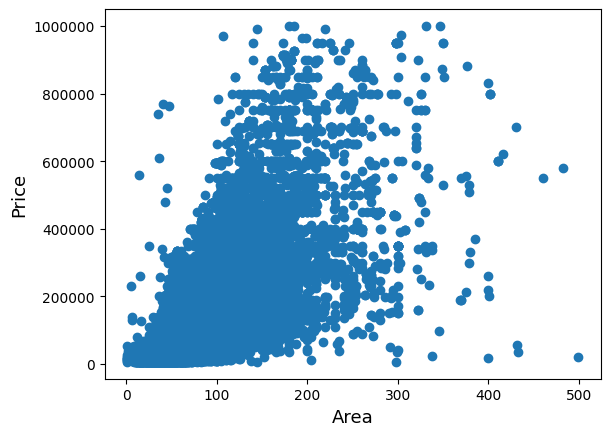

In [29]:
fig, ax = plt.subplots()
ax.scatter(x = data7[(data7.Area < 500) & (data7.Price < 1000000)]['Area'],
           y = data7[(data7.Area < 500) & (data7.Price < 1000000)]['Price'])
ax.ticklabel_format(style='plain')
plt.ylabel('Price', fontsize=13)
plt.xlabel('Area', fontsize=13)
plt.show()

In [30]:
data7.sort_values(by='Area', ascending=False)[:300]

,Region,City,Location,Floor,Total_floors,Area,Kitchen_area,Rooms,Price
67886,kiev,kiev,"Київ, Київська область",2,3,96000.0,18.0,3,85000
65781,uzhgorod,uzhgorod,"Ужгород, Закарпатська область",1,5,82000.0,15000.0,3,82000
60669,kiev,kiev,"Київ, Київська область",1,10,67000.0,8.3,3,69000
68747,kiev,sofievskaya-borschagovka,"Софіївська Борщагівка, Київська область",10,10,64000.0,13.0,2,85000
40682,odessa,odessa,"Одеса, Одеська область",12,22,62000.0,16.0,2,44000
55393,kiev,bucha,"Буча, Київська область",4,5,59000.0,12.0,2,59000
32651,ivano-frankovsk,ivano-frankovsk,"Івано-Франківськ, Івано-Франківська область",5,5,37700.0,43.0,2,37700
10214,odessa,odessa,"Одеса, Одеська область",1,2,21500.0,5.0,1,21500
49289,cherkassy,cherkassy,"Черкаси, Черкаська область",9,9,13315.0,15.0,5,49900
5550,zhitomir,yemilchino,"Ємільчине, Житомирська область",1,3,7170.0,730.0,3,16000


In [31]:
data8 = data7.copy()

### Outliers detection with Quantiles

In [32]:
max_threshold_ar = data7['Area'].quantile(0.95)
min_threshold_ar = data7['Area'].quantile(0.02)
max_threshold_pr = data7['Price'].quantile(0.95)
min_threshold_pr = data7['Price'].quantile(0.02)

data8 = data8[data8.Area < max_threshold_ar]
data8 = data8[data8.Area > min_threshold_ar]
data8 = data8[data8.Price < max_threshold_pr]
data8 = data8[data8.Price > min_threshold_pr]

print(f'Мінімальна площа - {round(min_threshold_ar)} м²     |  Максимальна площа - {round(max_threshold_ar)} м²')
print(f'Мінімальна ціна - {round(min_threshold_pr)} usd  |  Максимальна ціна - {round(max_threshold_pr)} usd')

Мінімальна площа - 23 м²     |  Максимальна площа - 126 м²
Мінімальна ціна - 11000 usd  |  Максимальна ціна - 250000 usd


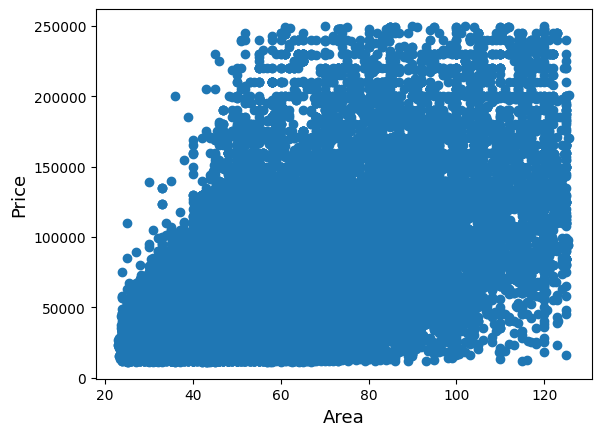

In [33]:
fig, ax = plt.subplots()
ax.scatter(x = data8['Area'], y=data8['Price'])
ax.ticklabel_format(style='plain')
plt.ylabel('Price', fontsize=13)
plt.xlabel('Area', fontsize=13)
plt.show()

## Fix Kitchen area errors

In [34]:
print(f"кількість рядків - {data8.shape[0]}")
print(f"кількість рядків c помилкою - {data8[((data8.Kitchen_area / data8.Area) >= 0.5) | (data8.Kitchen_area < 5)].shape[0]}")

кількість рядків - 76345
кількість рядків c помилкою - 2192


In [35]:
def fix_area_error(df):
    new_df = df.copy()
    for i in df[((df.Kitchen_area / df.Area) >= 0.5) | (df.Kitchen_area < 5)].index:
        room = new_df.loc[i, 'Rooms']
        new_df.loc[i, 'Kitchen_area'] = new_df[new_df.Rooms == room].Kitchen_area.median()
        
    return new_df

In [36]:
data9 = data8.copy()
data9 = fix_area_error(data9)

In [37]:
print(f"кількість рядків - {data9.shape[0]}")
print(f"кількість рядків c помилкою - {data9[((data9.Kitchen_area / data9.Area) >= 0.5) | (data9.Kitchen_area < 5)].shape[0]}")

data9.Price = data9.Price/data9.Area
data9 = data9.drop(['Kitchen_area'], axis=1)

кількість рядків - 76345
кількість рядків c помилкою - 0


Тепер в датасеті немає квартир з кухней менше 5 м² і кухонь, які займають 50% квартири.

# Floor transformation

In [38]:
def floor_transform(X):
    if X.Floor == 1:
        return 'First'
    
    elif X.Floor == X.Total_floors:
        return 'Last'
    
    else:
        return 'Middle'
    
data10 = data9.copy()
data10['Floor'] = data10.apply(floor_transform, axis=1)
data10.drop('Total_floors', axis=1, inplace=True)
data10.head()

,Region,City,Location,Floor,Area,Rooms,Price
1602,ivano-frankovsk,sadzhava,"Саджава, Івано-Франківська область",Last,63.00,3,238.095238
1604,ivano-frankovsk,burshtyn,"Бурштин, Івано-Франківська область",Last,50.00,3,296.000000
1607,ivano-frankovsk,galich,"Галич, Івано-Франківська область",Middle,50.00,2,240.000000
1608,ivano-frankovsk,burshtyn,"Бурштин, Івано-Франківська область",Middle,39.40,2,380.710660
1609,ivano-frankovsk,kalush,"Калуш, Івано-Франківська область",First,42.61,2,352.030040


# Save csv location

In [ ]:
def num_offers(X):
    return data10[data10.Location == X].shape[0]

# Sort
data_loc = data10.copy()
data_loc['Offers'] = data_loc.Location.apply(num_offers)
data_loc = data_loc.drop_duplicates(subset=['Location'], keep='first')
data_loc['Normalized'] = data_loc.Region + ' ' + data_loc.City
data_loc.sort_values(by='Offers', inplace=True, ascending=False)

# select only 2 columns
data_loc = data_loc.loc[:, ['Normalized', 'Location']]

# save to csv
data_loc.to_csv('../data/location.csv', index=False)

# Save final data

In [ ]:
data10.to_csv('../data/processed_data.csv', index=False)

# Save cities

In [1]:
tg_data = data10.copy()
tg_data.drop(['Floor', 'Area', 'Rooms', 'Price'], axis=1, inplace=True)


def delete_reg(X):
    return X.Location.split(', ')[0]

tg_data['Location'] = tg_data.apply(delete_reg, axis=1)
tg_data.to_csv('../data/data_cities.csv', index=False)